In [1714]:
#!pip install category_encoders

In [1715]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import category_encoders as ce



In [1716]:
# Load data from csv
Housing_data = pd.read_csv("train.csv")
Housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1717]:
#Check all columns
Housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [1718]:
#get shape of dataframe
Housing_data.shape

(1460, 81)

In [1719]:
#get model description of dataframe
Housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1720]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1721]:
#cheked any null column exist or not
nuni = Housing_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [1722]:
Housing_data.isnull().sum()[Housing_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [1723]:
#Drop columns with maximum missing values
Housing_data = Housing_data.drop(columns=['Id','Alley','PoolQC','Fence', 'MiscFeature'])

In [1724]:
#Housing_data = Housing_data.loc[:,(100*Housing_data.isnull().sum()/Housing_data.shape[0]).sort_values(ascending = False) < 50]
Housing_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
      

In [1725]:
Housing_data.shape

(1460, 76)

In [1726]:
#check missing values again
Housing_data.isnull().sum()[Housing_data.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

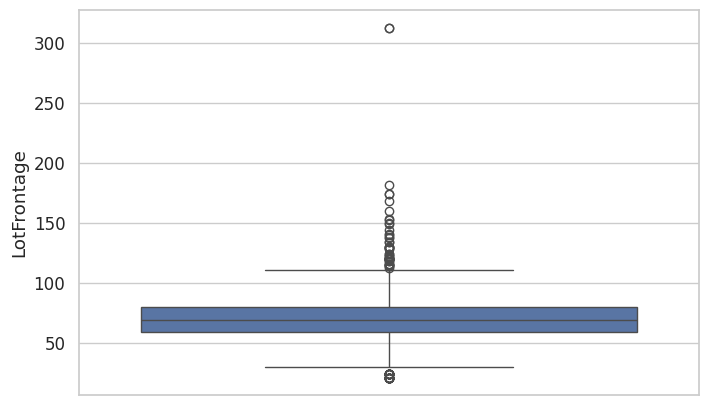

In [1727]:
#PLots for outlier analysis for LotFrontage
sns.boxplot(Housing_data.LotFrontage)
plt.show()

In [1728]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
Housing_data['LotFrontage'].fillna(Housing_data['LotFrontage'].mean(),inplace=True)

In [1729]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
Housing_data['MasVnrType']=Housing_data['MasVnrType'].fillna(Housing_data['MasVnrType'].mode()[0])
Housing_data['MasVnrArea']=Housing_data['MasVnrArea'].fillna(Housing_data['MasVnrArea'].mode()[0])

In [1730]:
Housing_data['BsmtQual']=Housing_data['BsmtQual'].fillna(Housing_data['BsmtQual'].mode()[0])
Housing_data['BsmtCond']=Housing_data['BsmtCond'].fillna(Housing_data['BsmtCond'].mode()[0])
Housing_data['BsmtExposure']=Housing_data['BsmtExposure'].fillna(Housing_data['BsmtExposure'].mode()[0])
Housing_data['BsmtFinType1']=Housing_data['BsmtFinType1'].fillna(Housing_data['BsmtFinType1'].mode()[0])
Housing_data['BsmtFinType2']=Housing_data['BsmtFinType2'].fillna(Housing_data['BsmtFinType2'].mode()[0])
Housing_data['Electrical']=Housing_data['Electrical'].fillna(Housing_data['Electrical'].mode()[0])
Housing_data['GarageType']=Housing_data['GarageType'].fillna(Housing_data['GarageType'].mode()[0])
Housing_data['GarageFinish']=Housing_data['GarageFinish'].fillna(Housing_data['GarageFinish'].mode()[0])
Housing_data['GarageQual']=Housing_data['GarageQual'].fillna(Housing_data['GarageQual'].mode()[0])
Housing_data['GarageCond']=Housing_data['GarageCond'].fillna(Housing_data['GarageCond'].mode()[0])
Housing_data['FireplaceQu']=Housing_data['FireplaceQu'].fillna(Housing_data['FireplaceQu'].mode()[0])

In [1731]:
#drop GarageYrBlt
Housing_data.drop(['GarageYrBlt'],axis=1,inplace=True)

In [1732]:
#check missing values again
Housing_data.isnull().sum()[Housing_data.isnull().sum()>0]

Series([], dtype: int64)

In [1733]:
Housing_data.shape

(1460, 75)

In [1734]:
Housing_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [1735]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt
Housing_data['HouseAge'] = Housing_data.YrSold - Housing_data.YearRemodAdd

In [1736]:
#Drop YrSold, YearBuilt after HouseAge
Housing_data=Housing_data.drop(columns=['YrSold', 'YearBuilt','YearRemodAdd','MoSold'])

In [1737]:
#converting the columns MSSubClass as categorical as it is a categorical col and not numerical
Housing_data['MSSubClass']=Housing_data['MSSubClass'].astype('object')

In [1738]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [1739]:
for c in Housing_data.columns:
    if Housing_data[c].dtype == object:
        print(c)
        print(Housing_data[c].value_counts(normalize=True))

MSSubClass
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: flo

In [1740]:
Num_features  = Housing_data.dtypes[Housing_data.dtypes != "object"].index
Num_features
len(Num_features)

32

In [1741]:
Cat_features  = Housing_data.dtypes[Housing_data.dtypes == "object"].index
Cat_features
len(Cat_features)

40

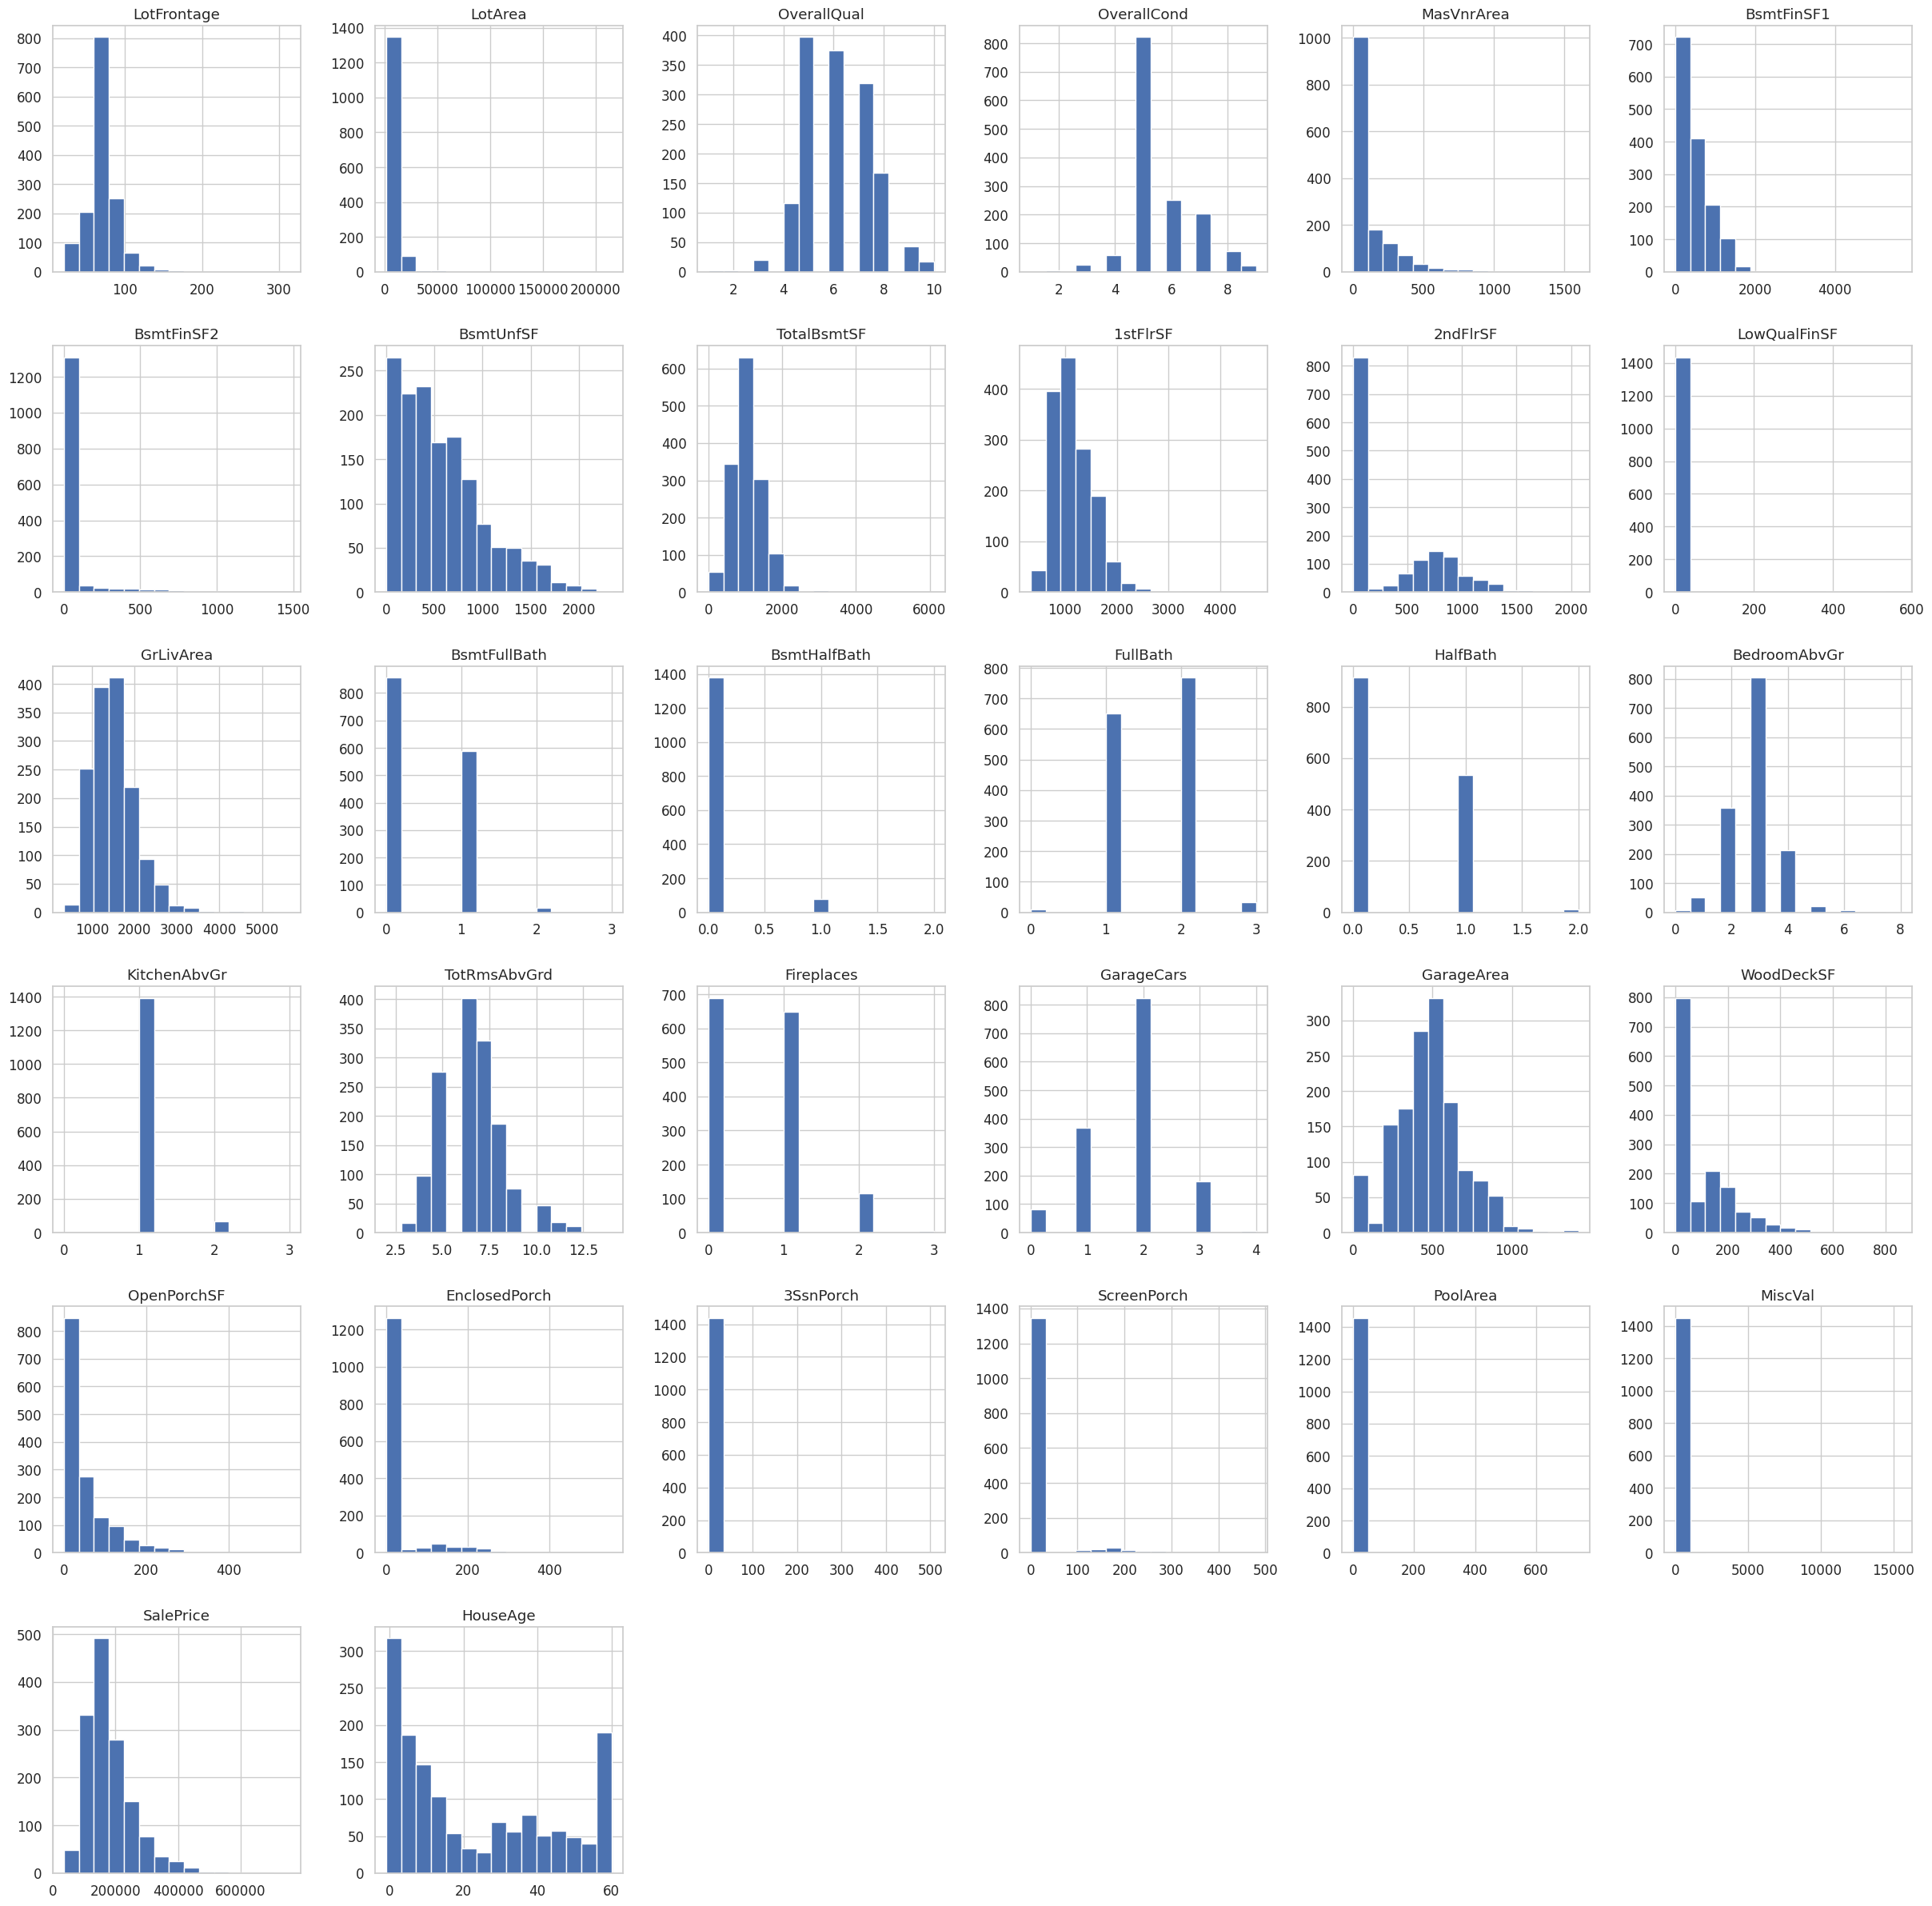

In [1742]:
Housing_data[Num_features].hist(bins=15, figsize=(30, 30))
plt.show()

In [1743]:
cor = Housing_data[Num_features].corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge
LotFrontage,1.000000,0.306795,0.234196,-0.052820,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901,-0.082329
LotArea,0.306795,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014709
OverallQual,0.234196,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.552570
OverallCond,-0.052820,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856,-0.070931
MasVnrArea,0.178699,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,-0.177105
BsmtFinSF1,0.215828,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.127556
BsmtFinSF2,0.043340,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.069814
BsmtUnfSF,0.122156,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.183830
TotalBsmtSF,0.363358,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.292096
1stFlrSF,0.414266,0.299475,0.476224,-0.144203,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,-0.241310


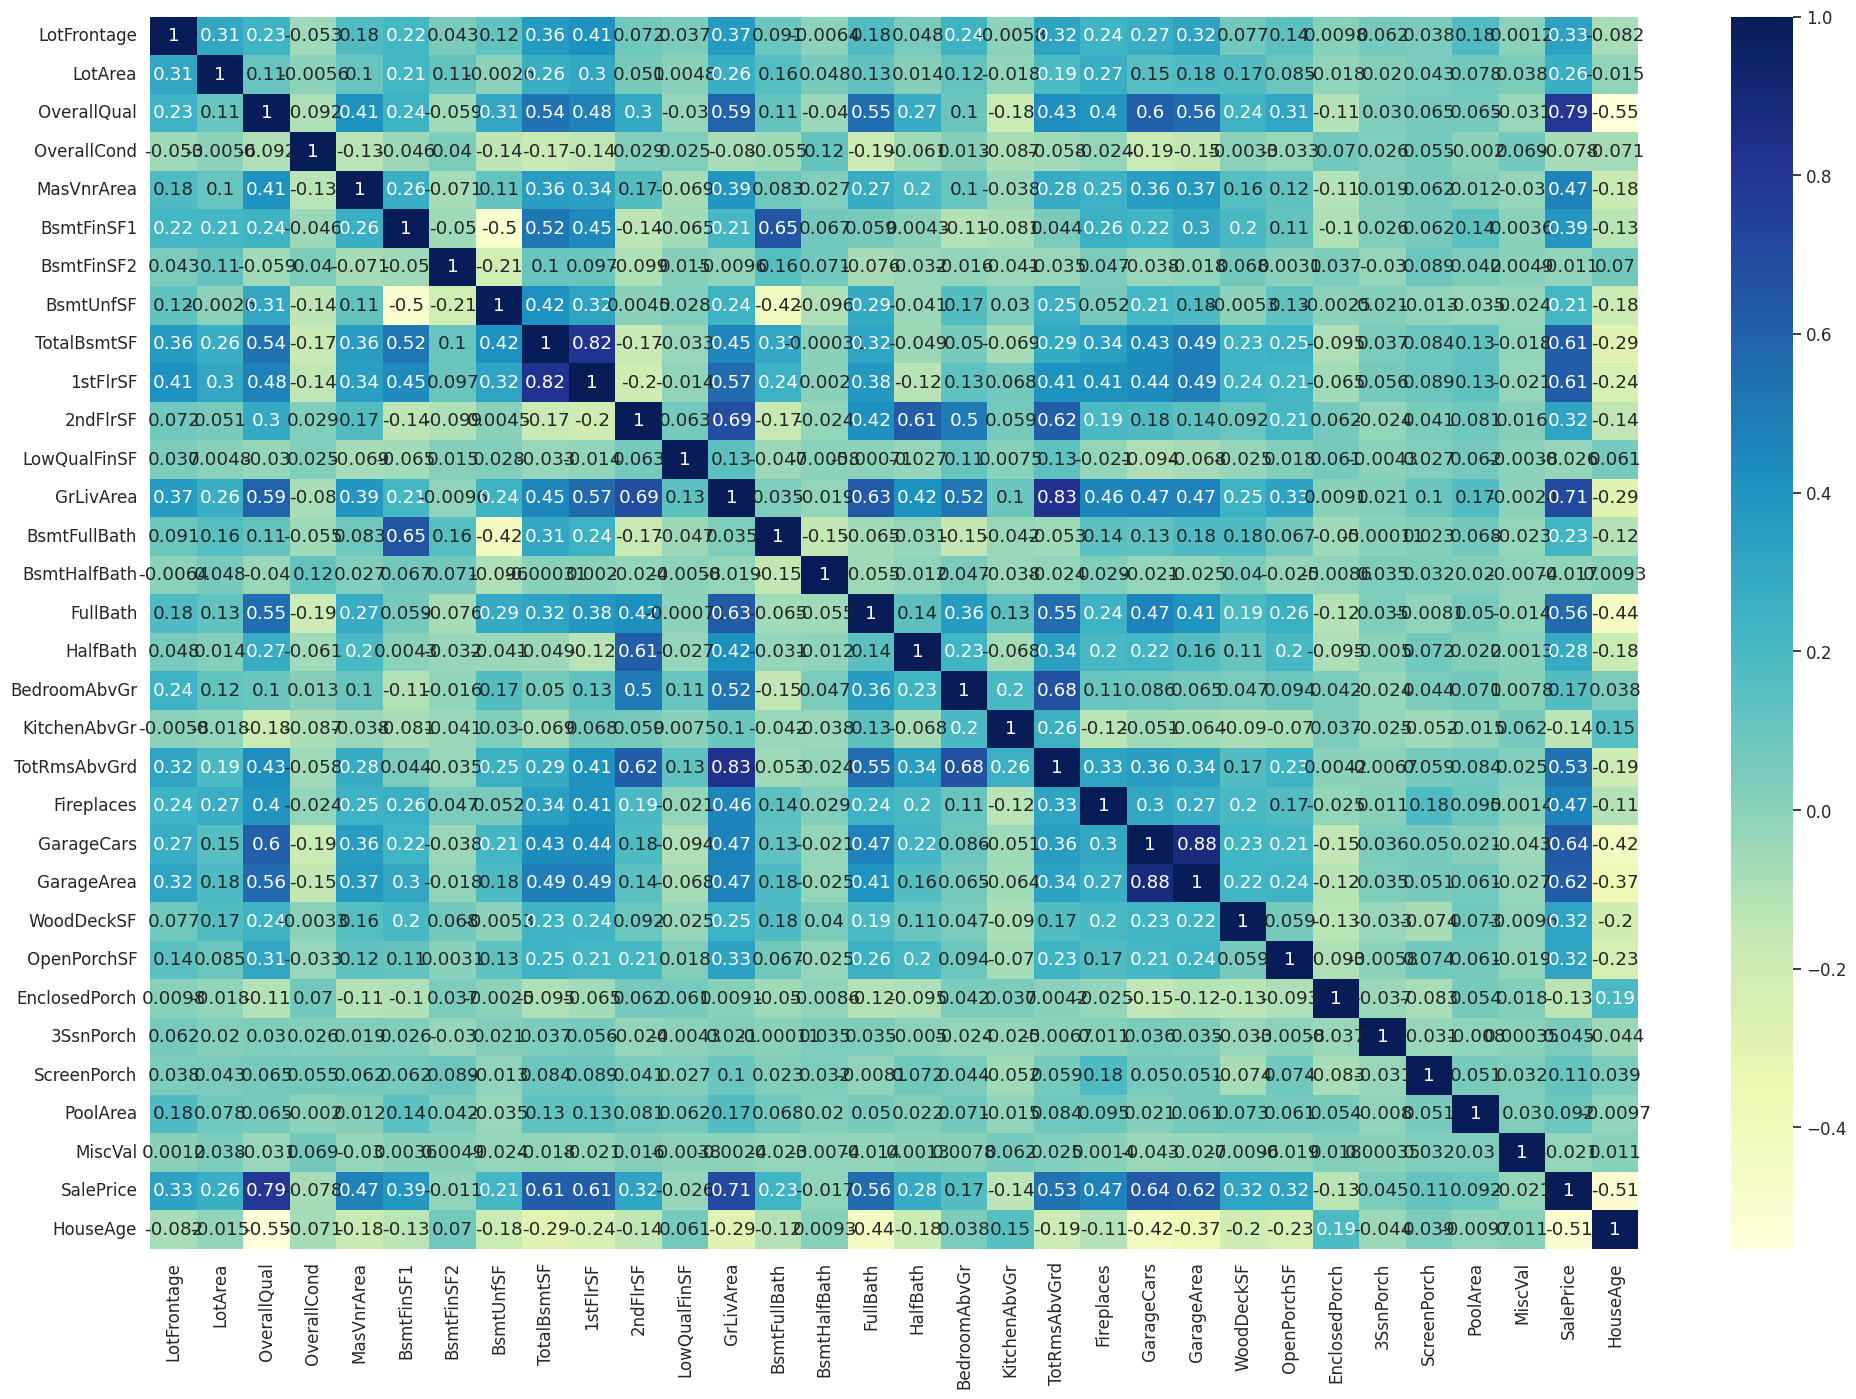

In [1744]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Inferences: Based on the correlation we can make few following interpretions



* SalePrice is very high positively correlated to the Overall Quality(0.79)
* SalePrice is very high positively correlated to the GrLivArea (0.71)
* SalePrice is very high positively correlated to the GarageCars(0.64)
* SalePrice is very high positively correlated to the GarageAre(0.62)
* SalePrice is very high positively correlated to the 1stFlrSF (0.61)
* SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
* SalePrice is very high positively correlated to the FullBath(0.56)
* SalePrice is very high positively correlated to the TotRmsAbvGrd(0.53)
* SalePrice is very high negatively correlated to the HouseAge(-0.51)

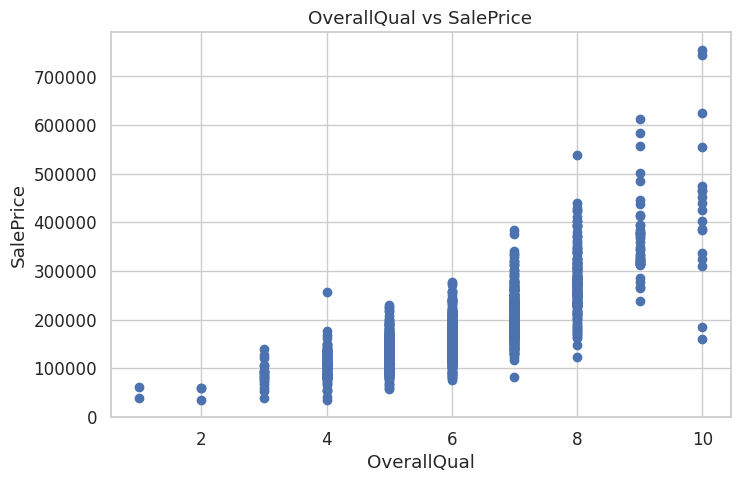

In [1745]:
plt.scatter(Housing_data.OverallQual, Housing_data.SalePrice)

plt.title('OverallQual vs SalePrice')

plt.xlabel('OverallQual')

plt.ylabel('SalePrice')

plt.show()


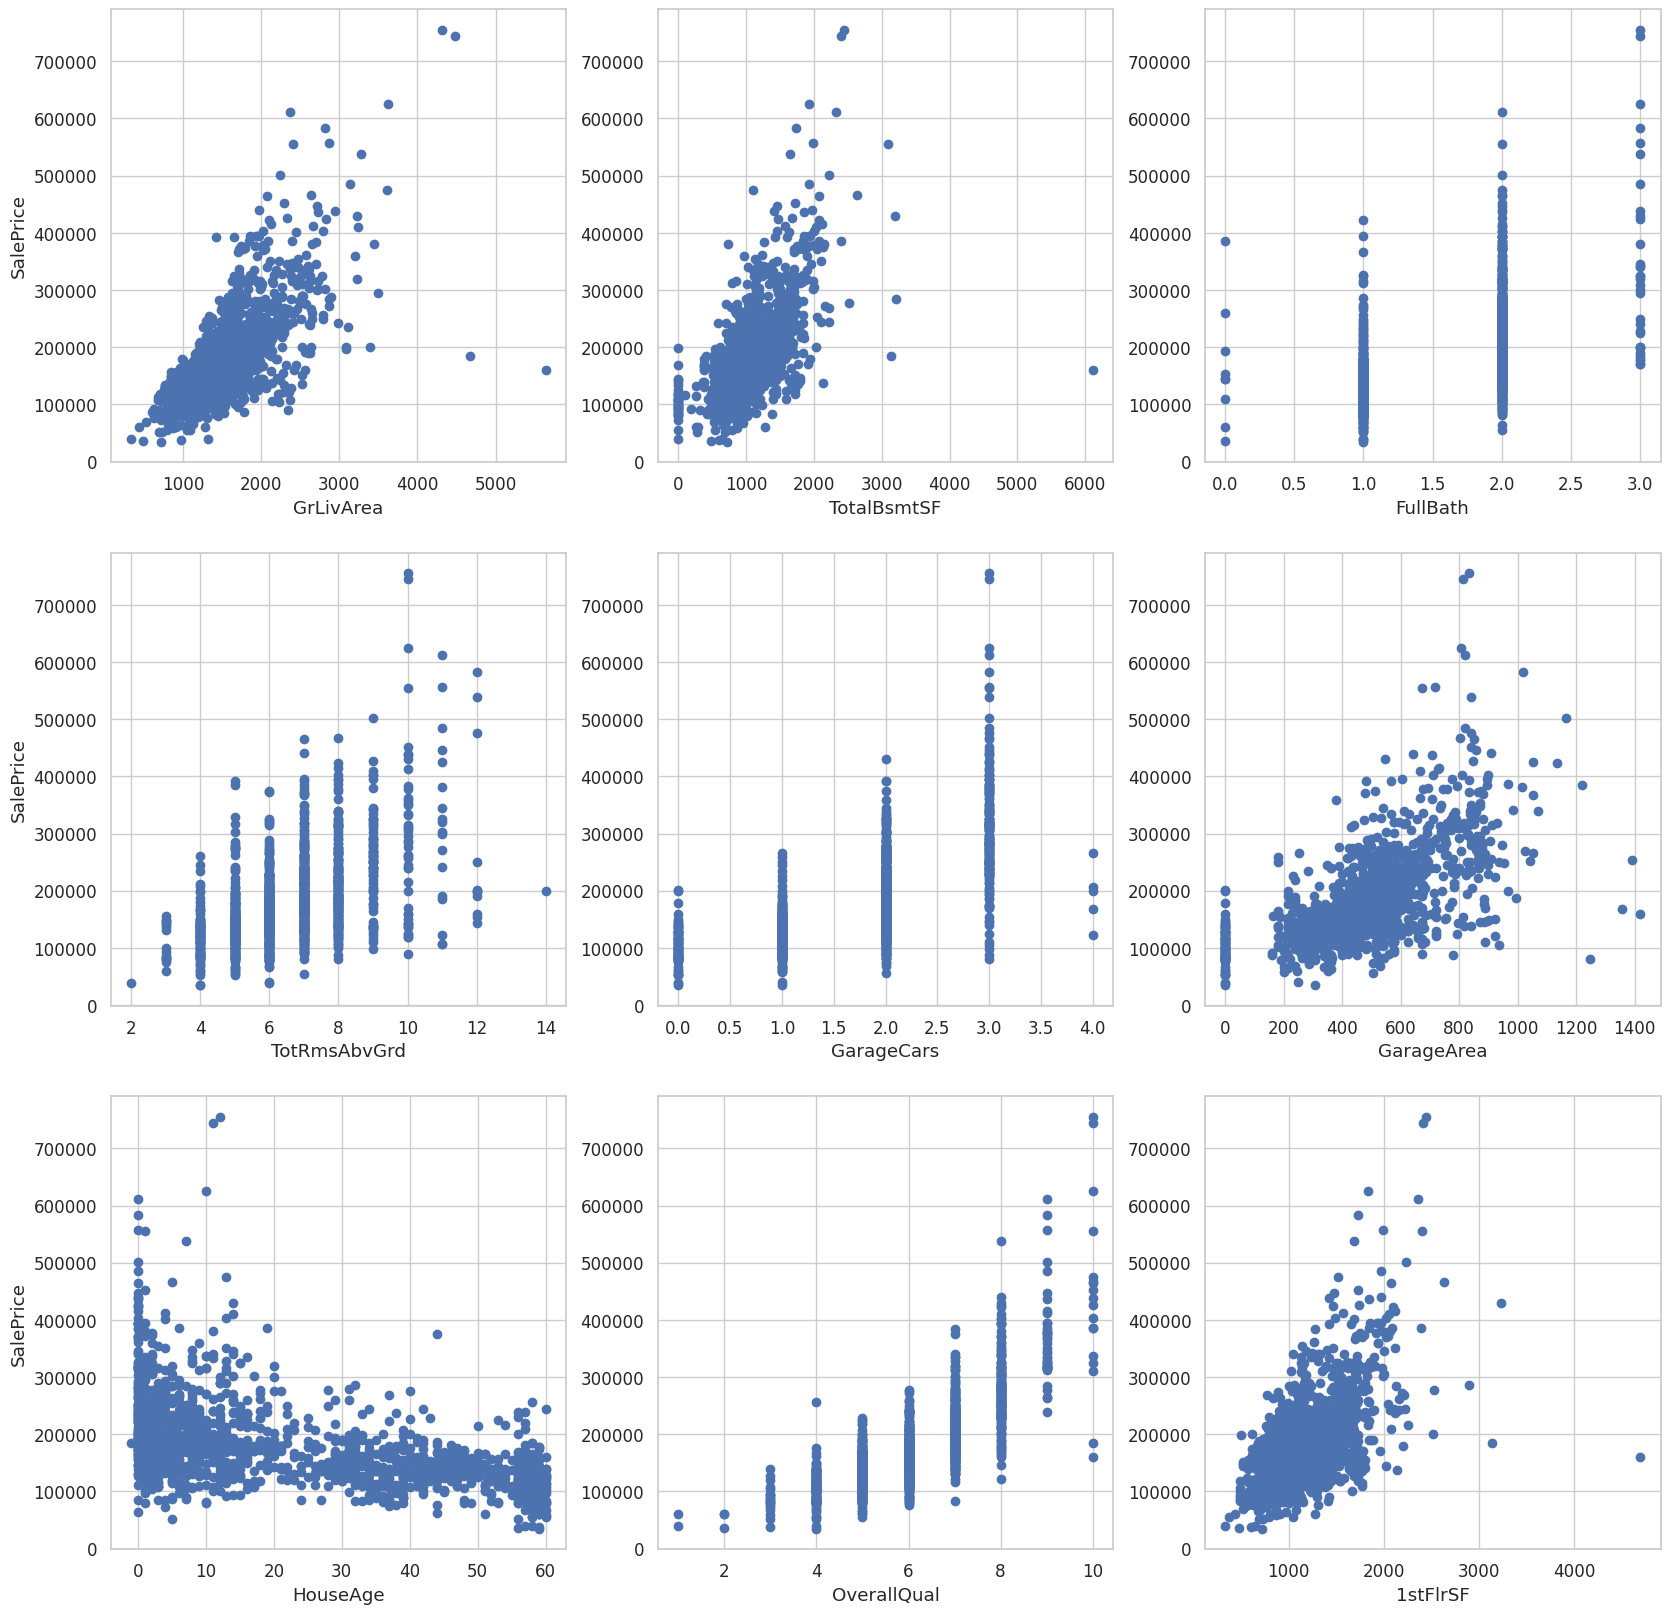

In [1746]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
plt.scatter(Housing_data.GrLivArea, Housing_data.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(Housing_data.TotalBsmtSF, Housing_data.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(Housing_data.FullBath, Housing_data.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(Housing_data.TotRmsAbvGrd, Housing_data.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(Housing_data.GarageCars, Housing_data.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(Housing_data.GarageArea, Housing_data.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(Housing_data.HouseAge, Housing_data.SalePrice)
plt.xlabel('HouseAge')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(Housing_data.OverallQual, Housing_data.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(Housing_data['1stFlrSF'], Housing_data.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

Inferences :
* We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
* We even observe that some variables like FullBath, GarageCars,TotRmsAbvGrd, OverallQual are not continuously distributed so we can encode them according to theie characteritics.

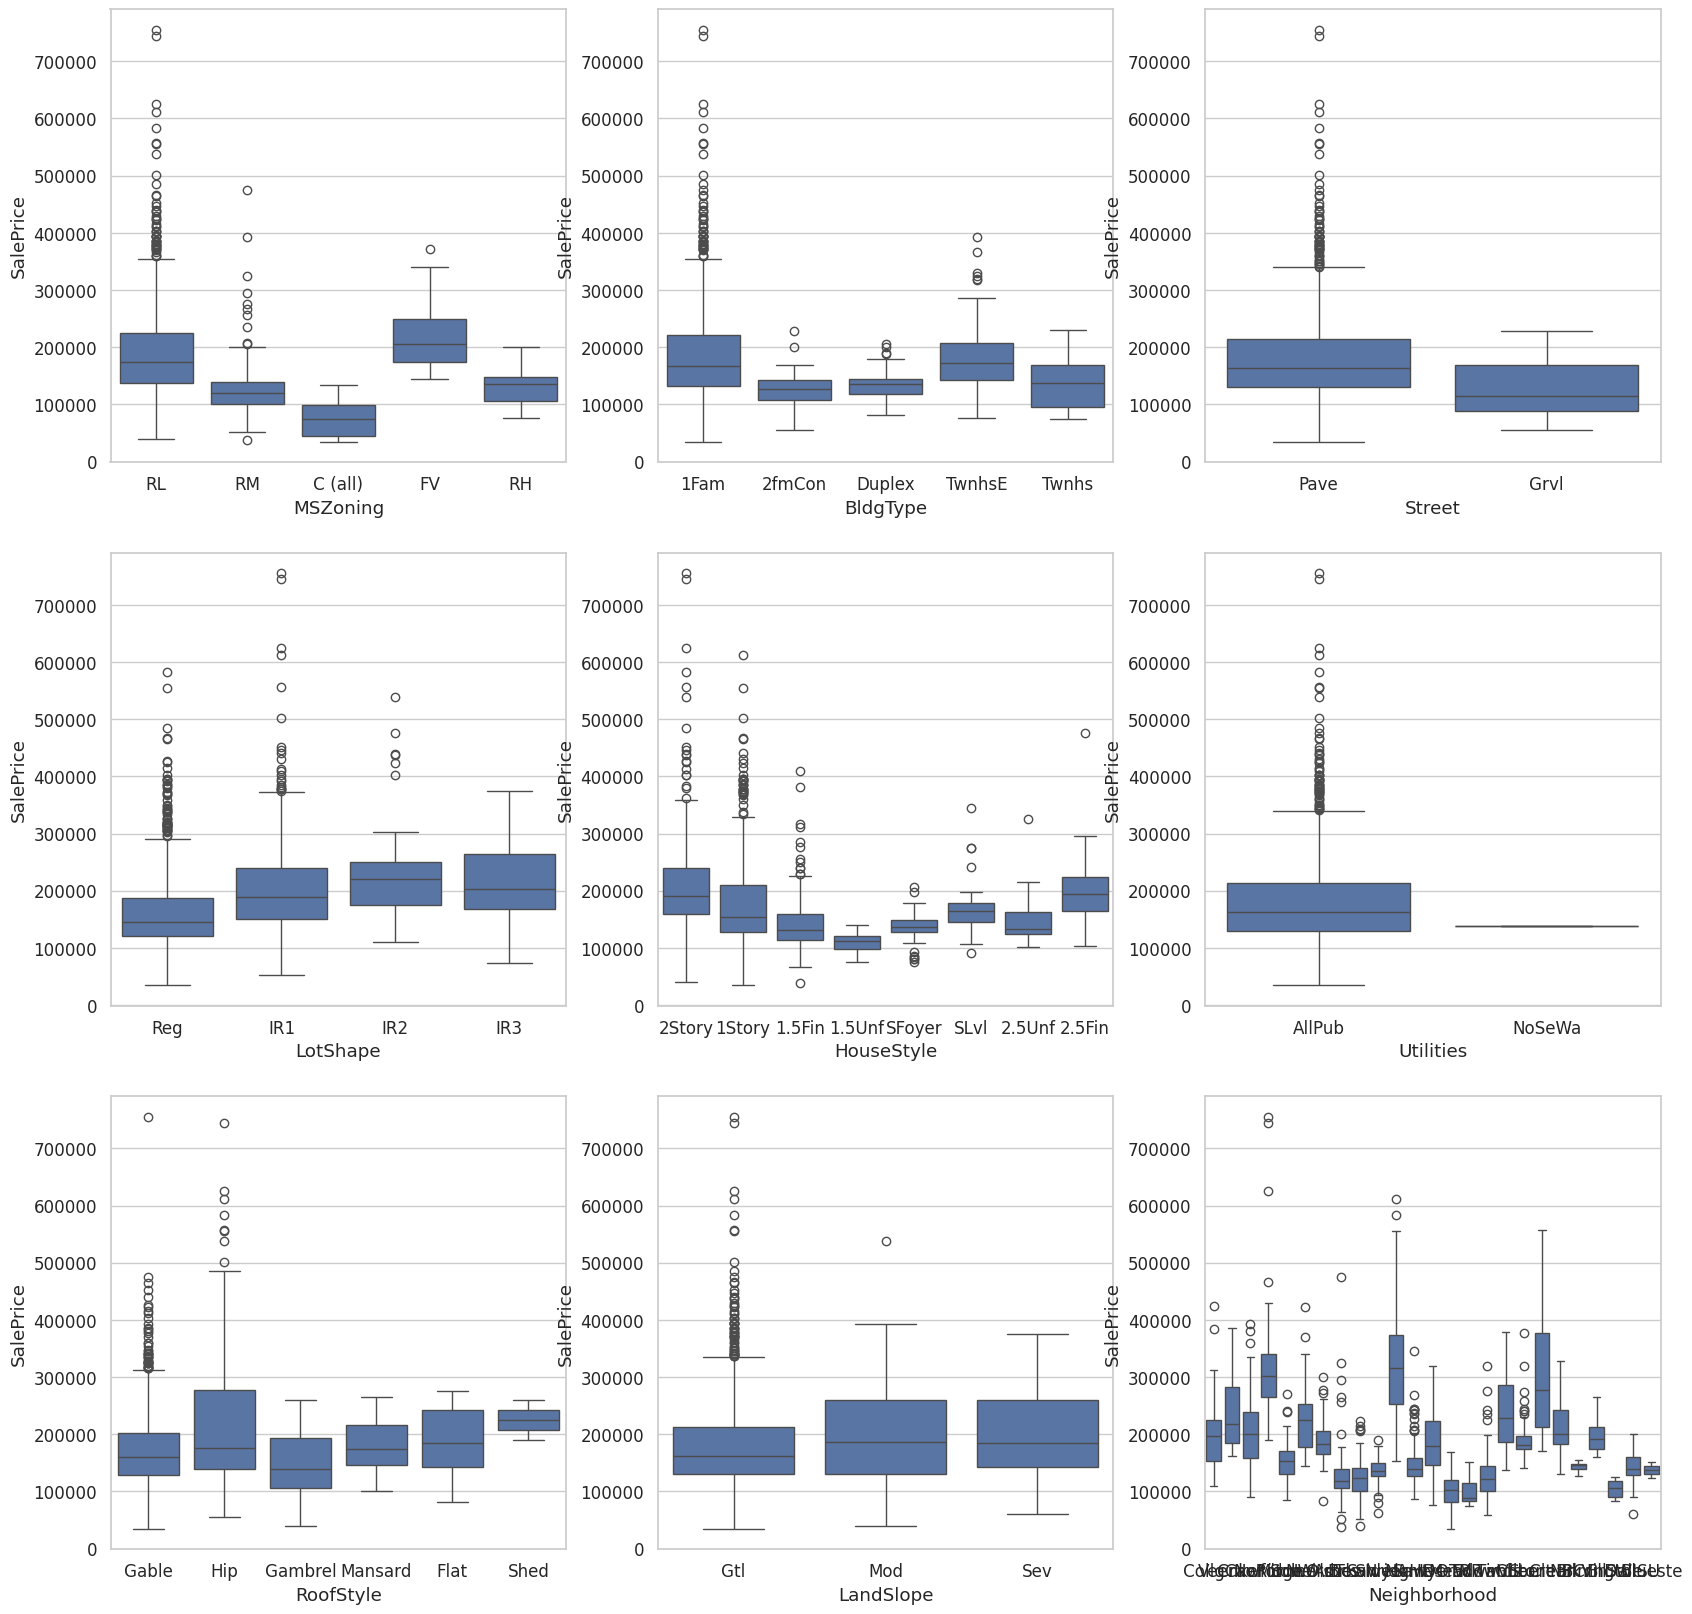

In [1747]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=Housing_data)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=Housing_data)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=Housing_data)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=Housing_data)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=Housing_data)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=Housing_data)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=Housing_data)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=Housing_data)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=Housing_data)
plt.show()

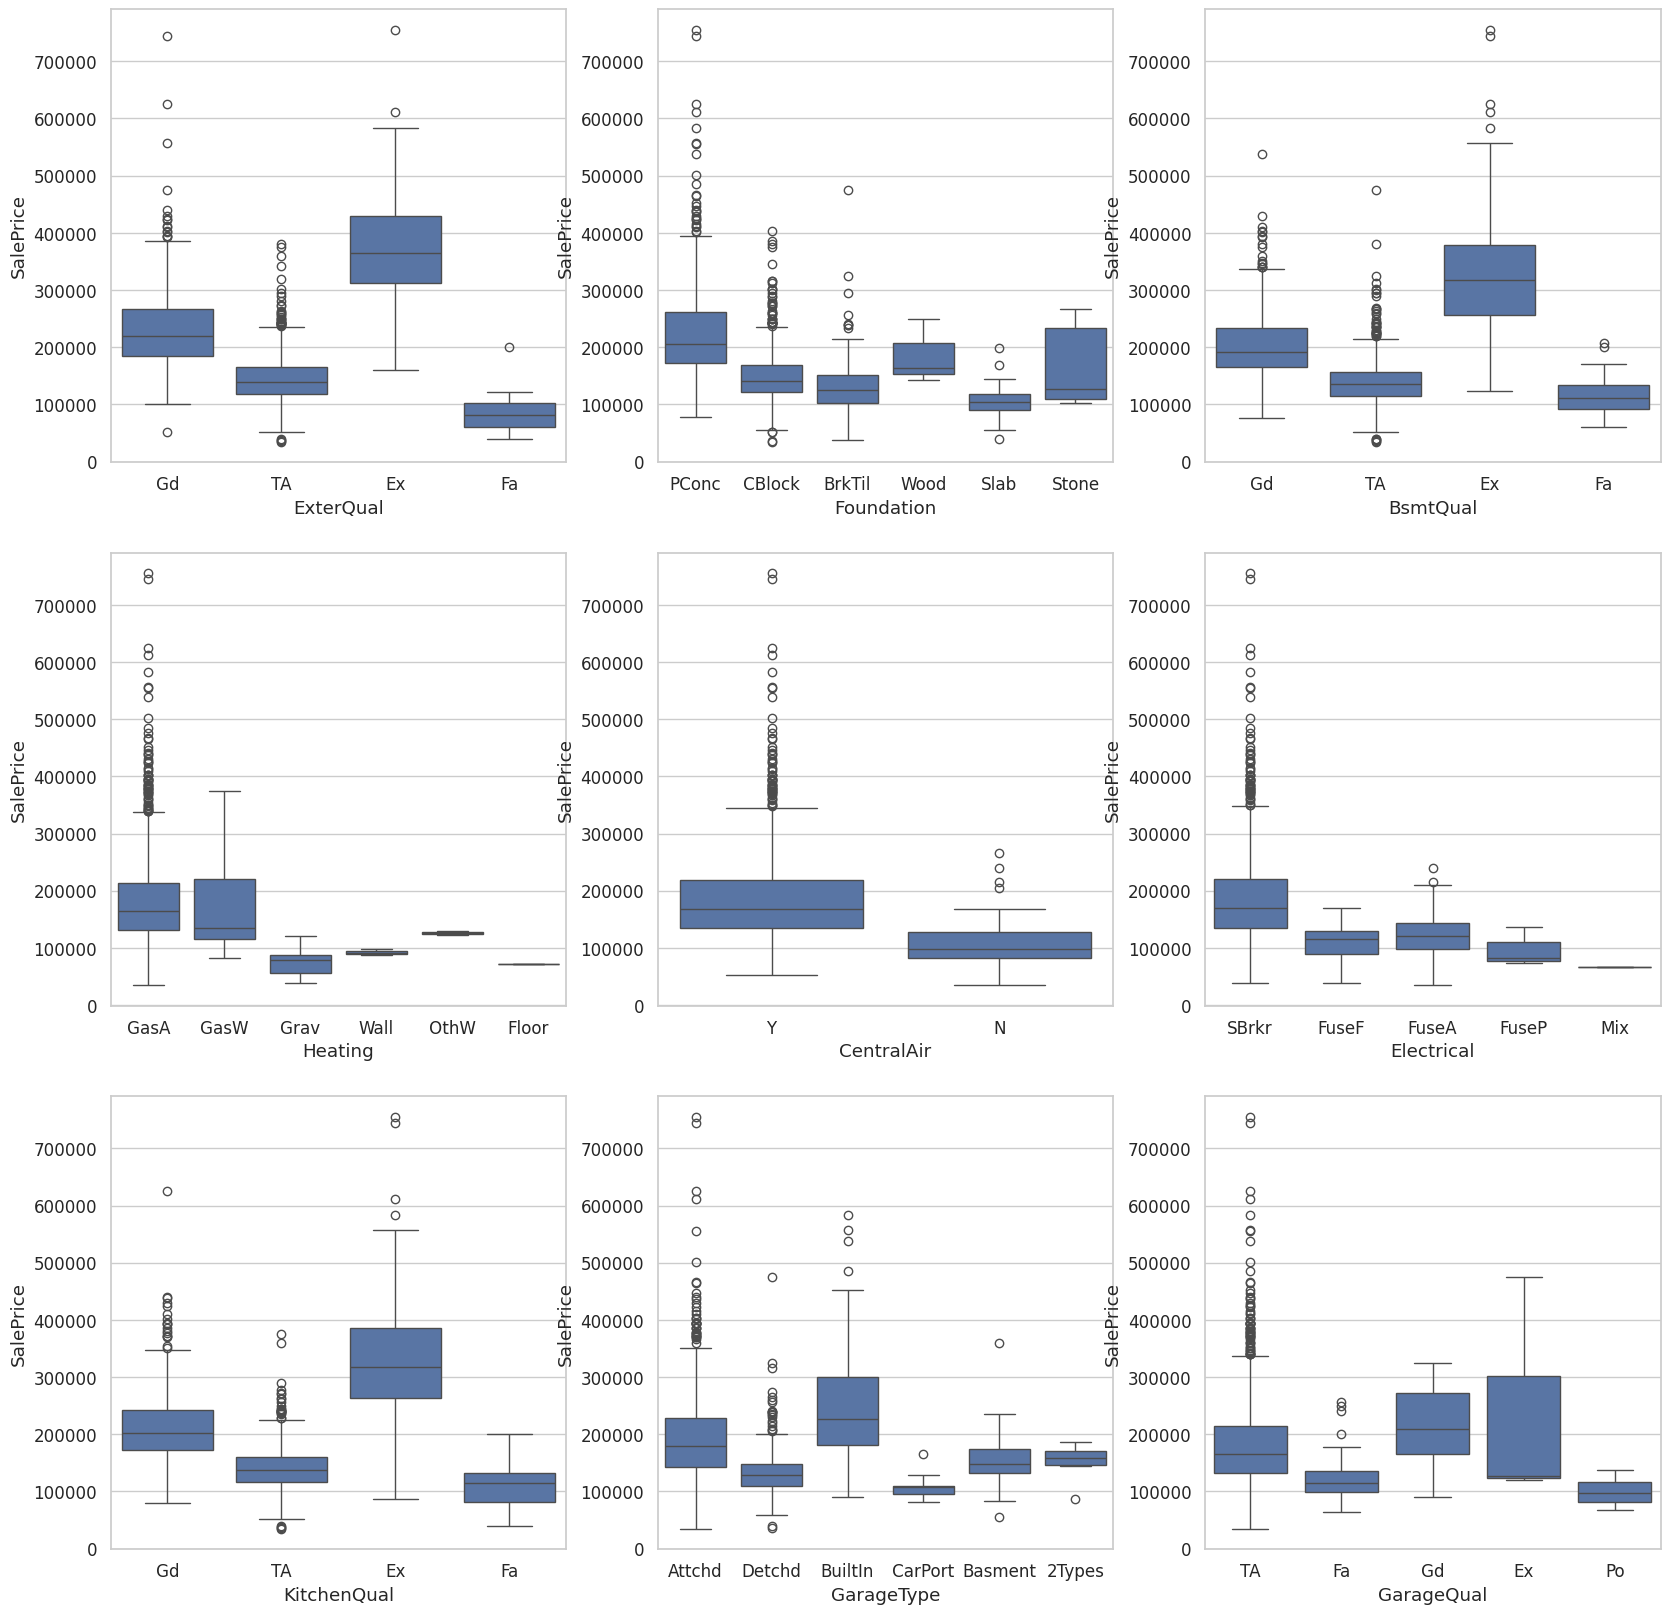

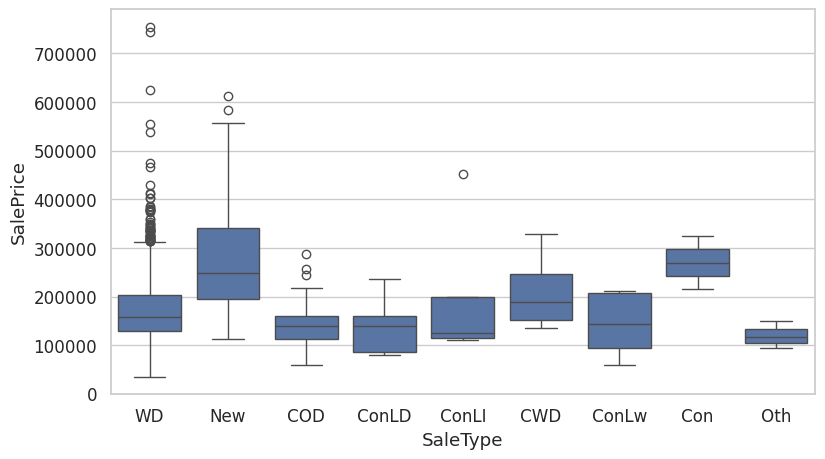

In [1748]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=Housing_data)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=Housing_data)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=Housing_data)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=Housing_data)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=Housing_data)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=Housing_data)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=Housing_data)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=Housing_data)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=Housing_data)
plt.show()
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=Housing_data)
plt.show()

In [1749]:
Housing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

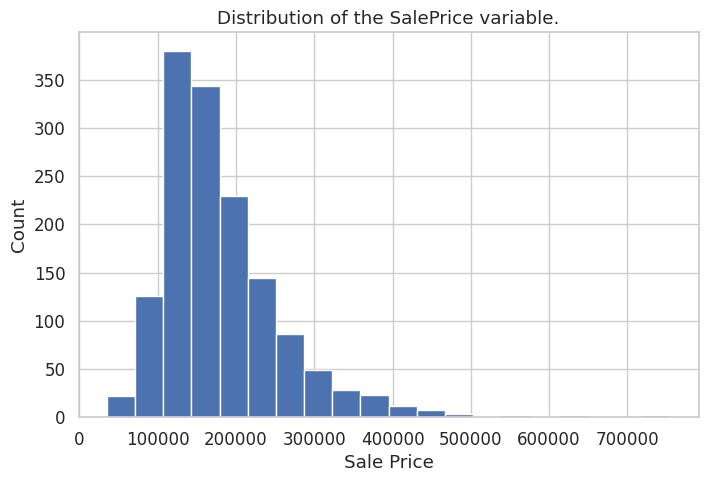

In [1750]:
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(Housing_data['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 180921.20 and sigma = 79415.29



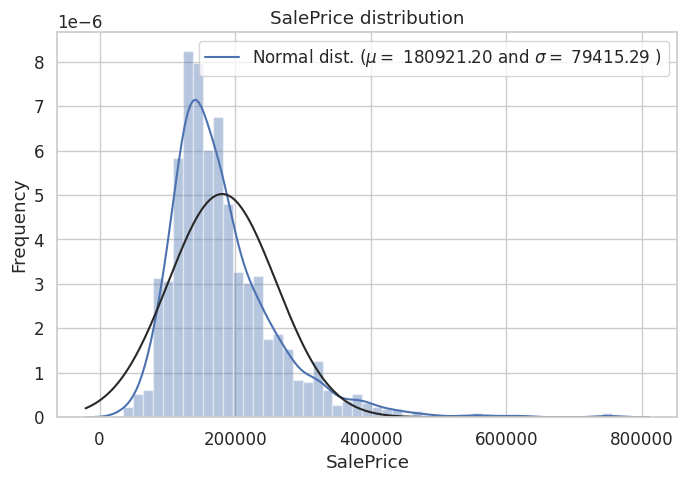

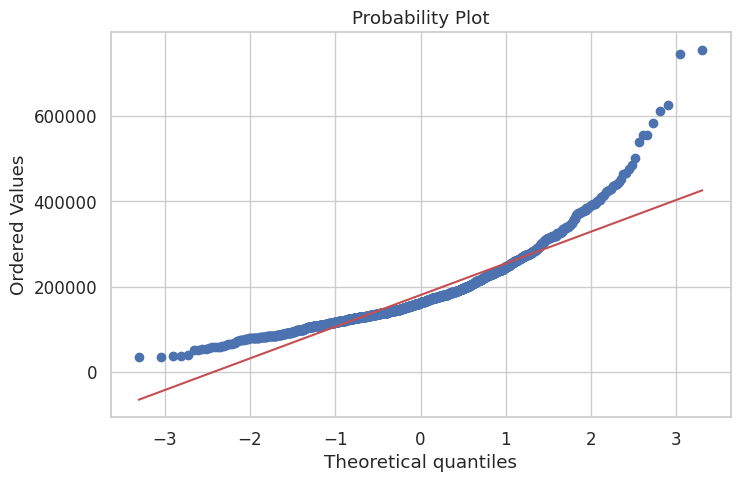

In [1751]:
from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.max_rows', 500)

sns.distplot(Housing_data['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(Housing_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(Housing_data['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



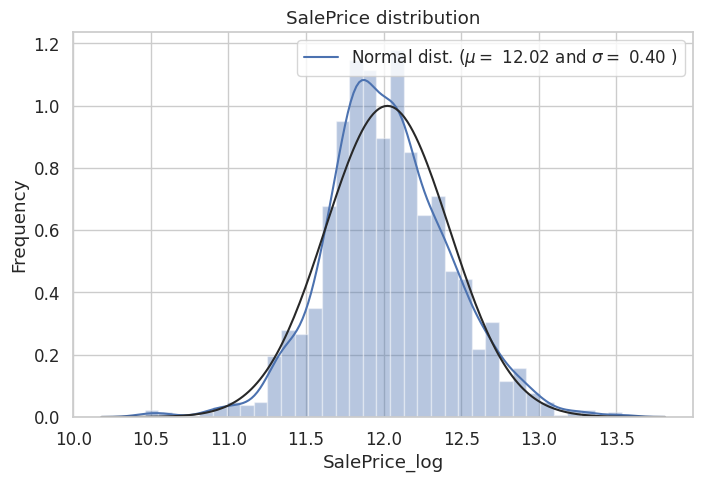

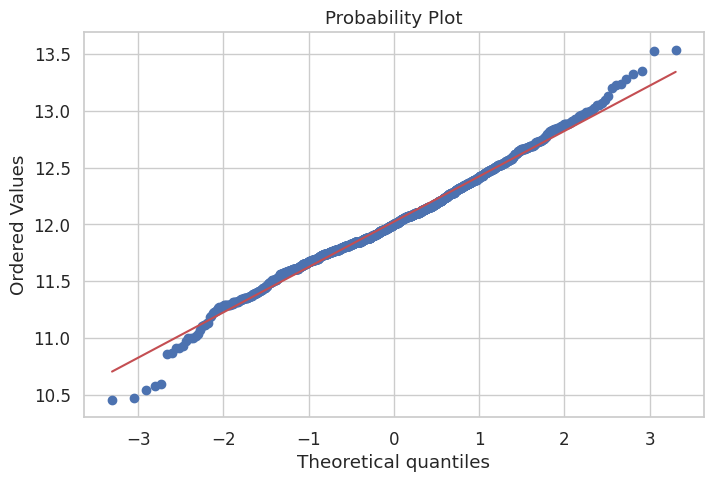

In [1752]:
#We use the numpy function log to all elements of the column
Housing_data["SalePrice_log"] = np.log(Housing_data["SalePrice"])

#Checking the new distribution
sns.distplot(Housing_data['SalePrice_log'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(Housing_data['SalePrice_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(Housing_data['SalePrice_log'], plot=plt)
plt.show()

In [1753]:
Housing_data.drop(['SalePrice_log'],axis=1,inplace=True)

In [1754]:
cat_features  = Housing_data.dtypes[Housing_data.dtypes == "object"].index
cat_features

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [1755]:
Num_features  = Housing_data.dtypes[Housing_data.dtypes != "object"].index
Num_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'HouseAge'], dtype='object')

In [1756]:
# Columns to apply label encoding to
columns_to_encode = cat_features

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column in the list
for column in columns_to_encode:
    Housing_data[column] = label_encoder.fit_transform(Housing_data[column])

In [1757]:
Housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge
0,5,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,1,2,548,4,4,2,0,61,0,0,0,0,0,8,4,208500,5
1,0,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1,1,8,8,1,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1,2,460,4,4,2,298,0,0,0,0,0,0,8,4,181500,31
2,5,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,1,2,608,4,4,2,0,42,0,0,0,0,0,8,4,223500,6
3,6,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1,1,13,15,1,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,2,3,642,4,4,2,0,35,272,0,0,0,0,8,0,140000,36
4,5,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,1,3,836,4,4,2,192,84,0,0,0,0,0,8,4,250000,8


In [1758]:
Housing_data.shape

(1460, 72)

In [1759]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(Housing_data, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(1021, 72)
(439, 72)


In [1760]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [1761]:
y_test=house_test.pop('SalePrice')
X_test=house_test

### Scaling

In [1762]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 318 to 792
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1021 non-null   int64  
 1   MSZoning       1021 non-null   int64  
 2   LotFrontage    1021 non-null   float64
 3   LotArea        1021 non-null   int64  
 4   Street         1021 non-null   int64  
 5   LotShape       1021 non-null   int64  
 6   LandContour    1021 non-null   int64  
 7   Utilities      1021 non-null   int64  
 8   LotConfig      1021 non-null   int64  
 9   LandSlope      1021 non-null   int64  
 10  Neighborhood   1021 non-null   int64  
 11  Condition1     1021 non-null   int64  
 12  Condition2     1021 non-null   int64  
 13  BldgType       1021 non-null   int64  
 14  HouseStyle     1021 non-null   int64  
 15  OverallQual    1021 non-null   int64  
 16  OverallCond    1021 non-null   int64  
 17  RoofStyle      1021 non-null   int64  
 18  RoofMatl    

In [1763]:
#1. Instantiate an scaler object
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes!= "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])


In [1764]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [1765]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,HouseAge
318,0.357143,0.75,0.236301,0.039403,1.0,1.0,0.666667,0.0,1.0,0.5,0.625000,0.250,0.285714,0.00,0.714286,0.666667,0.500,0.2,0.142857,0.428571,0.400000,0.5,0.16,0.666667,1.0,0.4,0.666667,1.000000,0.333333,0.4,0.174876,1.0,0.000000,0.154110,0.220458,0.2,0.0,1.0,1.0,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.666667,0.545455,1.0,0.333333,1.0,0.2,0.5,0.75,0.462623,1.00,1.0,1.0,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,1.0,0.8,0.278689
239,0.285714,0.75,0.106164,0.033981,1.0,1.0,1.000000,0.0,1.0,0.0,0.291667,0.250,0.285714,0.00,0.000000,0.555556,0.375,0.2,0.142857,0.857143,0.866667,0.5,0.00,1.000000,1.0,0.2,1.000000,0.000000,1.000000,0.6,0.016655,1.0,0.000000,0.274401,0.120295,0.2,1.0,1.0,0.0,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,1.000000,0.363636,1.0,0.333333,0.5,1.0,1.0,0.25,0.155148,1.00,1.0,1.0,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,1.0,0.8,1.000000
986,0.285714,1.00,0.130137,0.017931,1.0,1.0,1.000000,0.0,0.0,0.0,0.708333,0.125,0.285714,0.00,0.000000,0.555556,0.875,0.6,0.142857,0.857143,0.866667,0.5,0.00,1.000000,0.5,0.2,1.000000,0.000000,1.000000,1.0,0.000000,1.0,0.000000,0.207620,0.079378,0.2,0.5,1.0,1.0,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,0.666667,0.181818,1.0,0.000000,0.5,0.2,1.0,0.25,0.179831,0.25,1.0,1.0,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.8,0.065574
1416,1.000000,1.00,0.133562,0.046139,1.0,1.0,1.000000,0.0,1.0,0.0,0.708333,0.250,0.285714,0.25,0.714286,0.333333,0.625,0.2,0.142857,0.857143,0.000000,0.5,0.00,1.000000,1.0,0.4,1.000000,1.000000,1.000000,1.0,0.000000,1.0,0.000000,0.332620,0.127169,0.2,0.5,1.0,1.0,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,1.000000,0.727273,1.0,0.000000,0.5,1.0,1.0,0.50,0.394922,1.00,1.0,0.0,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,1.0,0.8,1.000000
390,0.285714,0.75,0.099315,0.032409,1.0,1.0,1.000000,0.0,1.0,0.0,0.291667,0.250,0.285714,0.00,0.000000,0.444444,0.875,0.2,0.142857,0.571429,0.533333,0.5,0.00,1.000000,1.0,0.0,1.000000,0.333333,1.000000,0.8,0.042700,0.2,0.265265,0.098031,0.140917,0.2,0.0,1.0,1.0,0.136343,0.196610,0.0,0.178517,0.333333,0.0,0.333333,0.0,0.500,0.0,1.000000,0.363636,1.0,0.000000,0.5,1.0,1.0,0.25,0.270804,1.00,1.0,1.0,0.000000,0.248566,0.202899,0.0,0.0,0.0,0.0,1.0,0.8,0.967213


In [1766]:
X_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,HouseAge
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.309570,0.757346,0.166956,0.042162,0.996082,0.649690,0.925563,0.000979,0.743634,0.032321,0.511223,0.253550,0.286414,0.130509,0.433469,0.565894,0.572600,0.278550,0.153071,0.685113,0.688410,0.541136,0.065306,0.847209,0.932419,0.281685,0.758733,0.936990,0.750245,0.552008,0.079406,0.939863,0.033980,0.241329,0.173813,0.207640,0.375612,0.928501,0.921401,0.184401,0.166364,0.011649,0.207562,0.146588,0.029873,0.522364,0.188541,0.357003,0.026934,0.781260,0.318582,0.960823,0.199478,0.589618,0.446817,0.616063,0.442948,0.332860,0.969882,0.975759,0.926053,0.108100,0.089934,0.042105,0.007756,0.037559,0.003318,0.003143,0.938786,0.750833,0.390729
std,0.302890,0.158330,0.075649,0.048221,0.062500,0.468083,0.234564,0.031296,0.412974,0.141537,0.248884,0.110714,0.037149,0.303448,0.275656,0.155515,0.136515,0.165625,0.083657,0.226460,0.233421,0.154261,0.117088,0.229967,0.183142,0.142895,0.290764,0.220051,0.384024,0.364837,0.082409,0.192882,0.115907,0.192097,0.075139,0.063094,0.435499,0.257782,0.260570,0.092106,0.210895,0.093608,0.102200,0.175127,0.120615,0.183957,0.250403,0.102499,0.115084,0.273430,0.145956,0.157733,0.215256,0.223990,0.353307,0.408844,0.186530,0.149657,0.143525,0.128481,0.251792,0.145250,0.126569,0.114434,0.063649,0.136582,0.053278,0.037314,0.197221,0.222225,0.337590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.750000,0.133562,0.027937,1.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.291667,0.250000,0.285714,0.000000,0.285714,0.444444,0.500000,0.200000,0.142857,0.571429,0.533333,0.500000,0.000000,0.666667,1.000000,0.200000,0.666667,1.000000,0.333333,0.200000,0.000000,1.000000,0.000000,0.092466,0.129787,0.200000,0.000000,1.000000,1.000000,0.116667,0.000000,0.000000,0.133935,0.000000,0.000000,0.333333,0.000000,0.250000,0.00

In [1767]:
y_train.head()

318     260000
239     113000
986     117000
1416    122500
390     119000
Name: SalePrice, dtype: int64

## Data Modeling - RFE Technique

In [1768]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [1769]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[-2.24679693e+04 -6.48933554e+03 -2.95441617e+04  5.66657335e+04
  2.84998314e+04 -3.60362130e+03  1.84586435e+04 -4.07594275e+04
  8.47807977e+02  2.22977393e+04  1.11293646e+04  2.88369043e+02
 -5.20934226e+04 -7.09981114e+03 -1.22503949e+04  1.10747321e+05
  2.61731229e+04  5.00290030e+03  4.12959905e+04  1.59438653e+03
 -1.01277510e+04 -6.52977338e+03  4.45199976e+04 -1.94826306e+04
  3.29237433e+03  1.33266023e+04 -3.25068501e+04  6.67012452e+03
 -1.36216101e+04 -6.67846872e+03 -1.52691234e+17  4.20717927e+03
 -3.98771933e+16 -6.31975059e+16  1.65298271e+17  2.22000000e+03
 -2.50400000e+03  2.70000000e+02  5.34500000e+02  3.86503559e+17
  1.84752280e+17  4.60762344e+16 -4.65593639e+17  3.34840000e+04
  6.81100000e+03  1.61495000e+04 -7.60500000e+02 -9.31200000e+03
 -1.89680000e+04 -2.74080000e+04  1.46040000e+04  2.48500000e+04
  2.03650000e+04 -1.21180000e+04 -5.91200000e+03 -2.18143750e+03
  4.87360000e+04 -1.42900000e+04  9.26000000e+03  6.26400000e+03
  1.99200000e+03  9.72600

In [1770]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=25)
rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('MSZoning', False, 29),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('Street', True, 1),
 ('LotShape', False, 34),
 ('LandContour', False, 4),
 ('Utilities', True, 1),
 ('LotConfig', False, 43),
 ('LandSlope', False, 3),
 ('Neighborhood', False, 10),
 ('Condition1', False, 46),
 ('Condition2', True, 1),
 ('BldgType', False, 26),
 ('HouseStyle', False, 19),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('RoofStyle', False, 31),
 ('RoofMatl', True, 1),
 ('Exterior1st', False, 41),
 ('Exterior2nd', False, 17),
 ('MasVnrType', False, 23),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 36),
 ('Foundation', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 15),
 ('BsmtExposure', False, 8),
 ('BsmtFinType1', False, 20),
 ('BsmtFinSF1', False, 22),
 ('BsmtFinType2', False, 35),
 ('BsmtFinSF2', False, 27),
 ('BsmtUnfSF', False, 28),
 ('TotalBsmtSF', True, 1),
 ('Heating', False, 42),
 ('HeatingQC', False, 38),
 ('Central

In [1771]:
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'Condition2', 'OverallQual', 'OverallCond', 'RoofMatl', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageCars', 'PoolArea'], dtype='object')

In [1772]:
X_train.columns[~rfe.support_]

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SaleType', 'SaleCondition', 'HouseAge'], dtype='object')

In [1773]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 25)
(439, 25)
(1021,)
(439,)


In [1774]:
lm1=lm.fit(X_train, y_train)

In [1775]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-5904915479139927.0
[-2.24679693e+04 -6.48933554e+03 -2.95441617e+04  5.66657335e+04
  2.84998314e+04 -3.60362130e+03  1.84586435e+04 -4.07594275e+04
  8.47807977e+02  2.22977393e+04  1.11293646e+04  2.88369043e+02
 -5.20934226e+04 -7.09981114e+03 -1.22503949e+04  1.10747321e+05
  2.61731229e+04  5.00290030e+03  4.12959905e+04  1.59438653e+03
 -1.01277510e+04 -6.52977338e+03  4.45199976e+04 -1.94826306e+04
  3.29237433e+03  1.33266023e+04 -3.25068501e+04  6.67012452e+03
 -1.36216101e+04 -6.67846872e+03 -1.52691234e+17  4.20717927e+03
 -3.98771933e+16 -6.31975059e+16  1.65298271e+17  2.22000000e+03
 -2.50400000e+03  2.70000000e+02  5.34500000e+02  3.86503559e+17
  1.84752280e+17  4.60762344e+16 -4.65593639e+17  3.34840000e+04
  6.81100000e+03  1.61495000e+04 -7.60500000e+02 -9.31200000e+03
 -1.89680000e+04 -2.74080000e+04  1.46040000e+04  2.48500000e+04
  2.03650000e+04 -1.21180000e+04 -5.91200000e+03 -2.18143750e+03
  4.87360000e+04 -1.42900000e+04  9.26000000e+03  6.26400000e+03
  1.9

In [1776]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [1777]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8252398771041547
0.8370153864933771
1115294026807.0317
460549719850.00726
1092354580.6141348
1049088200.1139117


# Ridge

In [1778]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [1779]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridge_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1780]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.5}
-20763.642145327754


In [1781]:
alpha = 0.5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([-25156.18291324, -14370.2867765 ,  87191.41582578,  25213.33817811,
       -26409.01024428, -42318.82612836, 120779.15341371,  34673.82152088,
        47798.46852684,  48623.40431049, -22556.47515424,  22934.5146384 ,
       -36017.62914863,  46586.93443656, 116445.89259985,  46533.61008391,
       -12518.7584947 , 113891.42971365,  48586.40136877,  23846.34309312,
       -33159.60434813, -28696.07456715,  22833.77607268,  46308.15056372,
       -30280.42208038])

In [1782]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8248066133645755
0.8363338738464898
1118059053821.0757
462475487269.6748
1095062736.3575668
1053474914.053929


#Lasso

In [1783]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1784]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 20}
-20806.818367446762


In [1785]:
alpha =20

lasso = Lasso(alpha=alpha)

lasso.fit(X_train1, y_train)

Lasso(alpha=20)

In [1786]:
lasso.coef_

array([-24798.80820892, -14594.70429022,  96357.85387289,  24864.81506741,
       -20520.38422296, -42761.14719716, 125734.67650524,  33502.6144775 ,
        45618.41591566,  47764.83286757, -22086.0429386 ,  22359.46688491,
       -35998.20088709,  31567.51862713,  32149.47549298,      0.        ,
       -22676.61721959, 233378.26160018,  48359.44993336,  20978.83886716,
       -33496.90968046, -27939.07579291,  23027.64719474,  45166.80873261,
       -30627.85951508])

In [1787]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8249524660059517
0.8371286945504668
1117128243193.1968
460229542424.5028
1094151070.708322
1048358866.5706214


In [1788]:
metric2

[0.8248066133645755,
 0.8363338738464898,
 1118059053821.0757,
 462475487269.6748,
 33091.73214501723,
 32457.278290915412]

In [1789]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.252399e-01,8.248066e-01,8.249525e-01
1,R2 Score (Test),8.370154e-01,8.363339e-01,8.371287e-01
2,RSS (Train),1.115294e+12,1.118059e+12,1.117128e+12
3,RSS (Test),4.605497e+11,4.624755e+11,4.602295e+11
4,MSE (Train),3.305079e+04,3.309173e+04,3.307795e+04
5,MSE (Test),3.238963e+04,3.245728e+04,3.237837e+04


# Model Evaluation

In [1790]:
ridge_pred = ridge.predict(X_test1)

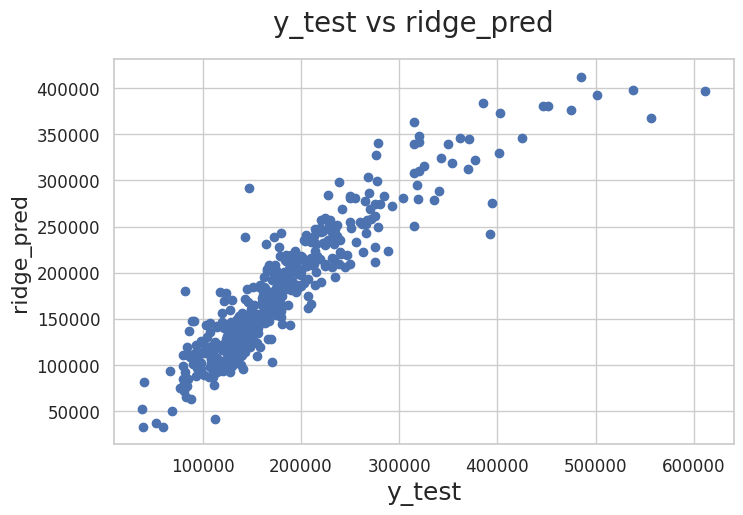

In [1791]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)
plt.show()

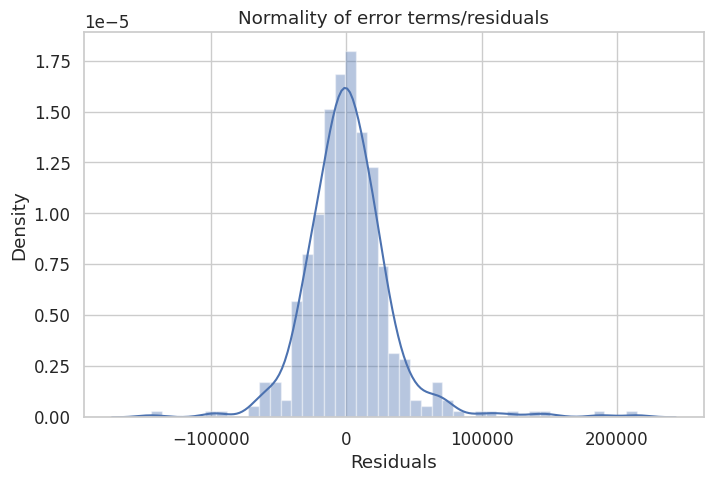

In [1792]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [1793]:
lasso_pred = lasso.predict(X_test1)

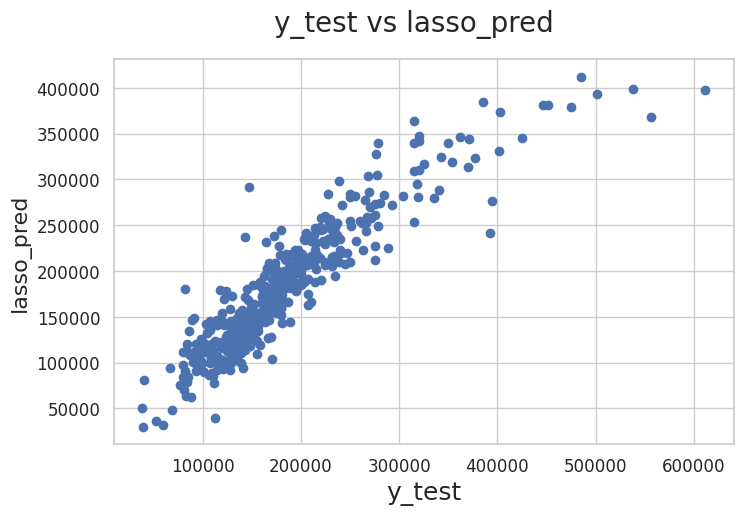

In [1794]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)
plt.show()

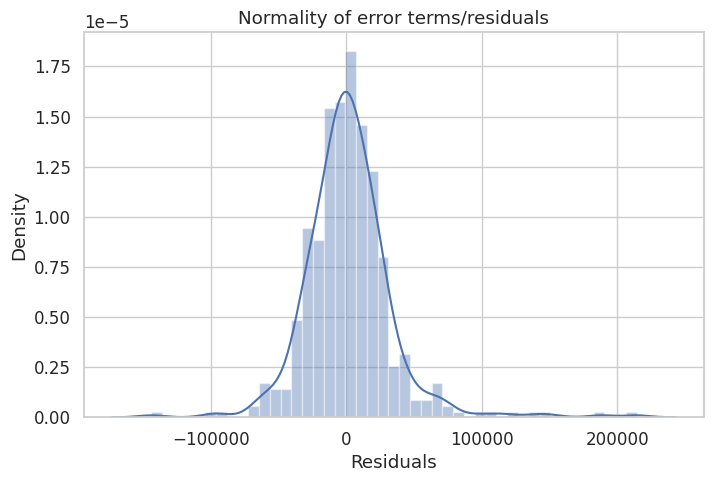

In [1795]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [1796]:
betas = pd.DataFrame(index=X_train1.columns)

In [1797]:
betas.rows = X_train1.columns

In [1798]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
#betas_sorted = betas.abs().sort_values(by=['Ridge', 'Lasso'], ascending=False)
betas.head(68)

,Ridge,Lasso
MSSubClass,-25156.182913,-24798.808209
LotFrontage,-14370.286776,-14594.704290
LotArea,87191.415826,96357.853873
Street,25213.338178,24864.815067
Utilities,-26409.010244,-20520.384223
Condition2,-42318.826128,-42761.147197
OverallQual,120779.153414,125734.676505
OverallCond,34673.821521,33502.614478
RoofMatl,47798.468527,45618.415916
MasVnrArea,48623.404310,47764.832868


# Subjective Question 1

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [1799]:
#Change the alpha value from 0.5 to 1
alpha = 1
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train1, y_train)

Ridge(alpha=1)

In [1800]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train1)
y_pred_test = ridge2.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

#0.8248066133645755
#0.8363338738464898

0.8239978593545518
0.8353184712938473
1123220405859.454
465344735790.0911
1100117929.343246
1060010787.6767452


R2score on training , testing data has decreased

In [1801]:
#Changed alpha 20 to 40
alpha =40
lasso40 = Lasso(alpha=alpha)
lasso40.fit(X_train1, y_train)

Lasso(alpha=40)

In [1802]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso40.predict(X_train1)
y_pred_test = lasso40.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

#R2score at alpha 20
#0.8249524660059517
#0.8371286945504668

0.8240959318030928
0.8367039606712412
1122594521565.9458
461429723624.9215
1099504918.2820234
1051092764.5214612


R2score on training , testing data has decreased

In [1803]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso40'] = lasso40.coef_
pd.set_option('display.max_rows', None)

betas.head(68)

,Ridge2,Ridge,Lasso,Lasso40
MSSubClass,-25319.511680,-25156.182913,-24798.808209,-24595.455792
LotFrontage,-8589.177328,-14370.286776,-14594.704290,-6340.619421
LotArea,73913.923518,87191.415826,96357.853873,83899.961510
Street,21340.676240,25213.338178,24864.815067,18182.926852
Utilities,-19266.333232,-26409.010244,-20520.384223,-0.000000
Condition2,-32366.358748,-42318.826128,-42761.147197,-25847.623690
OverallQual,118336.454980,120779.153414,125734.676505,127926.919167
OverallCond,33970.897138,34673.821521,33502.614478,31866.184627
RoofMatl,47335.156977,47798.468527,45618.415916,44199.343976
MasVnrArea,48385.208213,48623.404310,47764.832868,46464.553643


Coefficient of predictors changed

Question3.

In [1804]:
X_train1.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'Condition2', 'OverallQual', 'OverallCond', 'RoofMatl', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageCars', 'PoolArea'], dtype='object')

In [1805]:

X_train2 = X_train1.drop(['LotArea','OverallQual', '1stFlrSF','GrLivArea','MasVnrArea'],axis=1)
X_test2 = X_test1.drop(['LotArea','OverallQual', '1stFlrSF','GrLivArea','MasVnrArea'],axis=1)

In [1806]:
# alpha 10
alpha =10
lasso21 = Lasso(alpha=alpha)
lasso21.fit(X_train2, y_train)

Lasso(alpha=10)

In [1807]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso21.predict(X_train2)
y_pred_test = lasso21.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)
#R2score at alpha-10
#0.8859222400899005
#0.8646666084570094

0.7751812563134438
0.7919382318912622
1434760961442.641
587925368857.4877
1405250696.8096387
1339237742.2721815


R2score of training and testing data has decreased

In [1808]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train1.columns
betas['Lasso21'] = lasso21.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Lasso21
MSSubClass,-22168.885797
LotFrontage,12434.765387
Street,17140.540955
Utilities,0.000000
Condition2,-49860.747808
OverallCond,50322.588871
RoofMatl,86638.170577
ExterQual,-35584.406037
Foundation,29529.084982
BsmtQual,-41841.320700


five most important predictor variables


1.  TotalBsmtSF
2.  2ndFlrSF
3.  RoofMatl
4.  GarageCars
5. FullBath







